In [5]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
import pandas as pd

df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


   CreditScore  Age  Exited
0          619   42       1
1          608   41       0
2          502   42       1
3          699   39       0
4          850   43       0
5          645   44       1
6          822   50       0
7          376   29       1
8          501   44       0
9          684   27       0


<AxesSubplot: xlabel='CreditScore', ylabel='Age'>

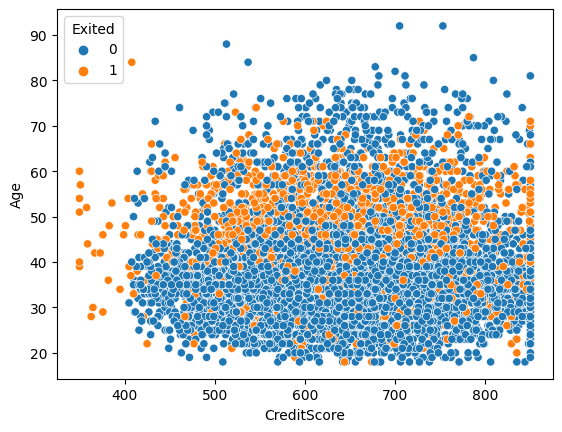

In [6]:
import seaborn as sns

data = df[['CreditScore', 'Age', 'Exited']]
print(data.head(10))
sns.scatterplot(data = data, x ='CreditScore', y = 'Age', hue = 'Exited')

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(data[['CreditScore', 'Age']], df['Exited'], test_size = 0.2, stratify = df['Exited'], random_state = 101)

In [8]:
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

In [9]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.19      0.04      0.07       407

    accuracy                           0.77      2000
   macro avg       0.49      0.50      0.47      2000
weighted avg       0.67      0.77      0.71      2000



In [10]:
classifier_o = LogisticRegression()
classifier_o.fit(X_oversample, y_oversample)
print(classification_report(y_test, classifier_o.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.73      0.79      1593
           1       0.36      0.60      0.45       407

    accuracy                           0.70      2000
   macro avg       0.62      0.66      0.62      2000
weighted avg       0.77      0.70      0.72      2000



   CreditScore  Age  Exited
0          619   42       1
1          608   41       0
2          502   42       1
3          699   39       0
4          850   43       0


<AxesSubplot: xlabel='Exited', ylabel='count'>

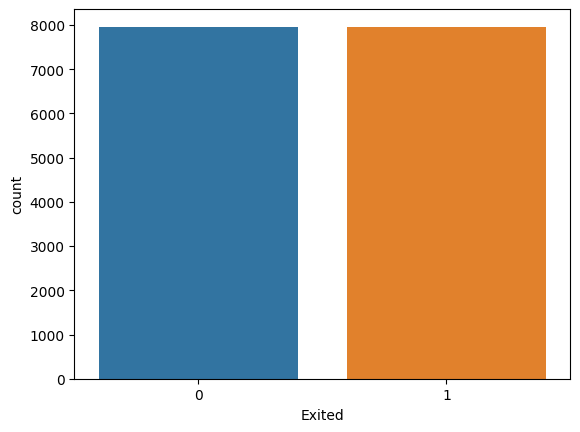

In [11]:
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df[['CreditScore', 'Age']], df['Exited'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])
df_oversampler['Exited']=y
print(df_oversampler.head())

sns.countplot(data=df_oversampler,x='Exited')

In [12]:
from collections import Counter
X=df[['CreditScore', 'Age']]
y=df['Exited']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({1: 7963, 0: 7963})


<AxesSubplot: xlabel='CreditScore', ylabel='Age'>

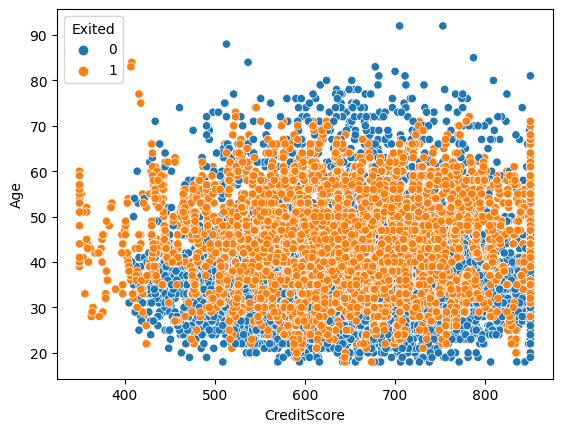

In [13]:
sns.scatterplot(data = df_oversampler, x ='CreditScore', y = 'Age', hue = 'Exited')